1st question:
using the Frozenlake gym environment solve the problem statement: the agent navigates a gird-like frozen lake and tries to reach a goal without falling into holes. The observation space in this environment is discrete. The observation space consists of a single discrete variable representing the current tile the agent is on. The title can have the following discrete values: Frozen(F): the tile is frozen and safe to step on, Hole(H): the tile is a hole, and if the agent steps on it, it falls into the hole and fails, Start(S): the tile is the starting point of the agent, Goal(G): the tile is the goal, and if the agent reaches it, it succeeds.

The agent receives one of these discrete observations at each time step, indicating the current tile it is occupying. It can use this information to determine its position in the environment and make decisions on which action to take.

Expected outcome: Path traversed to reach the goal, completion of the game and rewards achieved

In [ ]:
pip install gym

In [ ]:
import gym
envs = gym.envs.registry.all()
print(envs)
print('Total envs available:', len(envs))

dict_values([EnvSpec(id='CartPole-v0', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=0), EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=1), EnvSpec(id='MountainCar-v0', entry_point='gym.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='MountainCar', version=0), EnvSpec(id='MountainCarContinuous-v0', entry_point='gym.envs.classic_control.co

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:421: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


SHIV CHAT GPT 1ST CODE

In [ ]:
import gym
import numpy as np

env = gym.make("FrozenLake-v1")
state_space_size = env.observation_space.n
action_space_size = env.action_space.n

# Initialize Q-table
Q = np.zeros((state_space_size, action_space_size))

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        # Choose an action using epsilon-greedy policy
        if np.random.rand() < 0.5:
            action = env.action_space.sample()  # Exploration
        else:
            action = np.argmax(Q[state, :])  # Exploitation

        # Take the chosen action
        next_state, reward, done, _ = env.step(action)

        # Update Q-value using the Q-learning update rule
        Q[state, action] = (1 - learning_rate) * Q[state, action] + \
                           learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))

        state = next_state

# After training, you can use the learned Q-values to take actions in the environment


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


SHIV CHATGPT 2ND CODE

In [ ]:
import gym
import numpy as np

def q_learning(env, learning_rate=0.8, discount_factor=0.95, epsilon=0.1, num_episodes=1000):
    state_space_size = env.observation_space.n
    action_space_size = env.action_space.n

    Q = np.zeros((state_space_size, action_space_size))

    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            # Choose an action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Exploration
            else:
                action = np.argmax(Q[state, :])  # Exploitation

            # Take the chosen action
            next_state, reward, done, _ = env.step(action)

            # Update Q-value using the Q-learning update rule
            Q[state, action] = (1 - learning_rate) * Q[state, action] + \
                               learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))

            state = next_state

        # Print the path for one episode (optional)
        print(f"Episode {episode + 1}: {get_path(Q, env)}")

    return Q

def get_path(Q, env):
    state = env.reset()
    path = [state]

    while True:
        action = np.argmax(Q[state, :])
        state, _, done, _ = env.step(action)
        path.append(state)

        if done:
            break

    return path

# Create Frozen Lake environment
env = gym.make("FrozenLake-v1")

# Train the agent using Q-learning
trained_Q = q_learning(env)

# Print the path for a sample episode
sample_path = get_path(trained_Q, env)
print(f"Sample Path: {sample_path}")

# Evaluate the agent's performance over multiple episodes
total_reward = 0
num_episodes = 100

for _ in range(num_episodes):
    state = env.reset()
    episode_reward = 0

    while True:
        action = np.argmax(trained_Q[state, :])
        state, reward, done, _ = env.step(action)
        episode_reward += reward

        if done:
            break

    total_reward += episode_reward

# Print average reward over episodes
###average_reward = total_reward / num_episodes
average_reward = total_reward
print(f"Average Reward over {num_episodes} episodes: {average_reward}")


https://sciml-leeds.github.io/workshop/reinforcement_learning/2023/05/05/Reinforcement_learning_Solution.html

Success rate: 0.58


Text(0, 0.5, 'Rolling average reward (window size 100)')

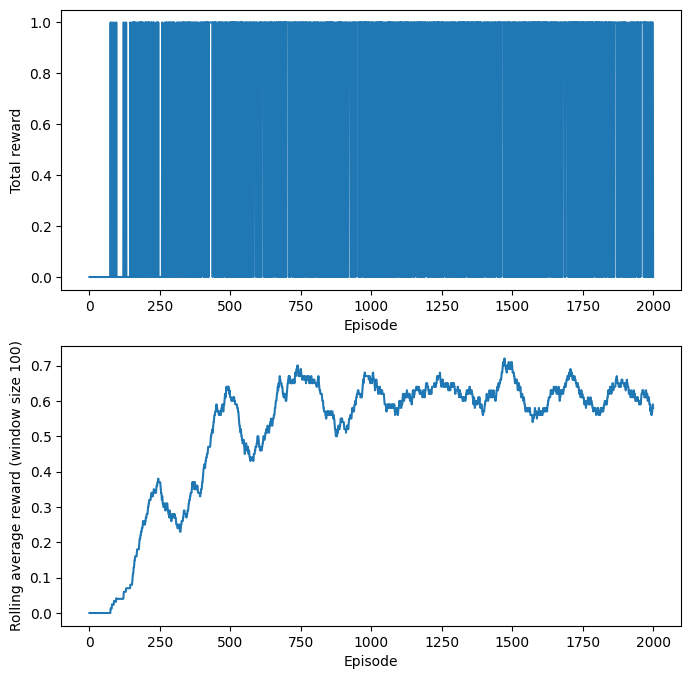

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt


# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')

# Initialize the Q-table to zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set hyperparameters
lr = 0.8  # learning rate
gamma = 0.95  # discount factor
num_episodes = 2000  # number of training episodes

# Keep track of the total reward for each episode
rewards = np.zeros(num_episodes)

# Train the agent using Q-learning
for i in range(num_episodes):
    # Reset the environment for each episode
    s = env.reset()
    done = False
    while not done:
        # Choose an action based on the Q-table, with some random noise
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1./(i+1)))

        # Take the chosen action and observe the next state and reward
        s_new, r, done, _ = env.step(a)

        # Update the Q-table based on the observed reward
        Q[s,a] = Q[s,a] + lr*(r + gamma*np.max(Q[s_new,:]) - Q[s,a])


        # Add the reward to the total reward for the episode
        rewards[i] += r

        # Set the current state to the next state
        s = s_new

# Test the agent on 100 episodes
num_successes = 0
for i in range(100):
    s = env.reset()
    done = False
    while not done:
        # Choose an action based on the Q-table
        a = np.argmax(Q[s,:])
        s, r, done, _ = env.step(a)
    if r == 1:
        num_successes += 1

# Print the success rate
print("Success rate:", num_successes/100)

# Calculate the rolling average of rewards
rolling_avg_rewards = np.zeros(num_episodes)
window_size = 100
for i in range(num_episodes):
    rolling_avg_rewards[i] = np.mean(rewards[max(0,i-window_size+1):(i+1)])


# Plot the total rewards and rolling average rewards
fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax[0].plot(rewards)
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Total reward')
ax[1].plot(rolling_avg_rewards)
ax[1].set_xlabel('Episode')
ax[1].set_ylabel(f'Rolling average reward (window size {window_size})')

SHIV chat gpt 3rd code modified from https://sciml-leeds.github.io/workshop/reinforcement_learning/2023/05/05/Reinforcement_learning_Solution.html

**THE SELECTED ONE FOR 1ST PROBLEM**

Episode 1: Path = [0, 1, 5], Completion = Failure, Total Reward = 0.0
Episode 2: Path = [0, 4, 5], Completion = Failure, Total Reward = 0.0
Episode 3: Path = [0, 4, 8, 9, 10, 14, 15], Completion = Success, Total Reward = 1.0
Episode 4: Path = [0, 4, 4, 0, 0, 0, 1, 5], Completion = Failure, Total Reward = 0.0
Episode 5: Path = [0, 4, 0, 4, 0, 0, 4, 8, 8, 4, 5], Completion = Failure, Total Reward = 0.0
Episode 6: Path = [0, 0, 4, 5], Completion = Failure, Total Reward = 0.0
Episode 7: Path = [0, 4, 4, 8, 12], Completion = Failure, Total Reward = 0.0
Episode 8: Path = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 5], Completion = Failure, Total Reward = 0.0
Episode 9: Path = [0, 0, 0, 1, 5], Completion = Failure, Total Reward = 0.0
Episode 10: Path = [0, 0, 0, 1, 1, 0, 0, 1, 5], Completion = Failure, Total Reward = 0.0
Episode 11: Path = [0, 0, 4, 4, 5], Completion = Failure, Total Reward = 0.0
Episode 12: Path = [0, 0, 0, 4, 4, 0, 4, 8, 4, 0, 0, 4, 8, 12], Completion = Failure, Tot

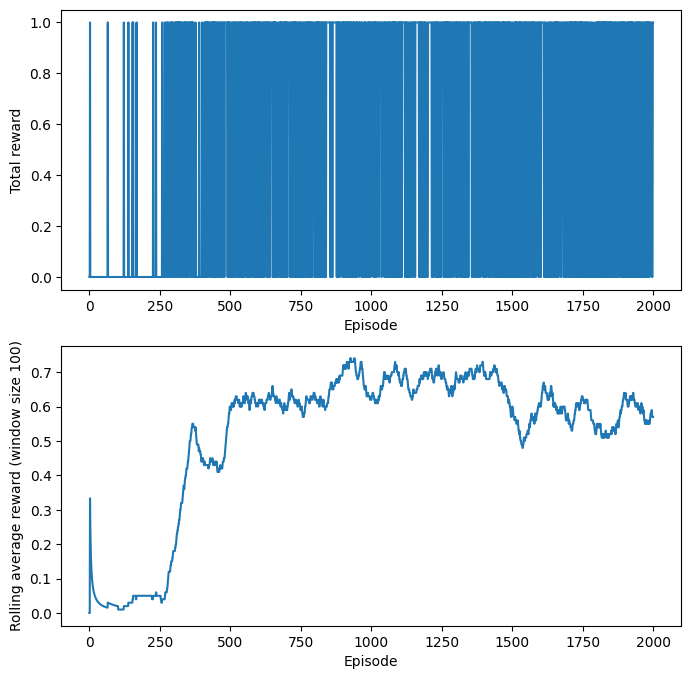

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')

# Initialize the Q-table to zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set hyperparameters
lr = 0.8  # learning rate
gamma = 0.95  # discount factor
num_episodes = 2000  # number of training episodes

# Keep track of the total reward for each episode
rewards = np.zeros(num_episodes)

# Train the agent using Q-learning
for i in range(num_episodes):
    # Reset the environment for each episode
    s = env.reset()
    done = False

    # Keep track of the path for each episode
    path = [s]

    while not done:
        # Choose an action based on the Q-table, with some random noise
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1./(i+1)))

        # Take the chosen action and observe the next state and reward
        s_new, r, done, _ = env.step(a)

        # Update the Q-table based on the observed reward
        Q[s,a] = Q[s,a] + lr*(r + gamma*np.max(Q[s_new,:]) - Q[s,a])

        # Add the reward to the total reward for the episode
        rewards[i] += r

        # Add the next state to the path
        path.append(s_new)

        # Set the current state to the next state
        s = s_new

    # Print path, completion status, and total reward for each episode
    print(f"Episode {i+1}: Path = {path}, Completion = {'Success' if r == 1 else 'Failure'}, Total Reward = {rewards[i]}")
# Calculate the average reward over training episodes
average_reward_training = np.mean(rewards)
print(f"Average Reward over {num_episodes} training episodes: {average_reward_training}")

# Test the agent on 100 episodes
num_successes = 0
for i in range(100):
    s = env.reset()
    done = False
    while not done:
        # Choose an action based on the Q-table
        a = np.argmax(Q[s,:])
        s, r, done, _ = env.step(a)
    if r == 1:
        num_successes += 1

# Print the success rate
print("Success rate:", num_successes/100)

# Calculate the rolling average of rewards
rolling_avg_rewards = np.zeros(num_episodes)
window_size = 100
for i in range(num_episodes):
    rolling_avg_rewards[i] = np.mean(rewards[max(0,i-window_size+1):(i+1)])

# Plot the total rewards and rolling average rewards
fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax[0].plot(rewards)
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Total reward')
ax[1].plot(rolling_avg_rewards)
ax[1].set_xlabel('Episode')
ax[1].set_ylabel(f'Rolling average reward (window size {window_size})')
plt.show()
